In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load the dataset
data = pd.read_csv('../01_data/transaction_dataset.csv', index_col='Unnamed: 0')
print(data.shape)
data.head()

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


# Exploratory Data Analysis (EDA)
## Duplicate Check

In [37]:
# Check duplicates
drop_col = [['Index'], ['Index', 'FLAG'], ['Index', 'Address']]

for col in drop_col:
    num_dup = sum(data.drop(columns=col).duplicated())
    print(num_dup)

18
18
546


There are 18 duplicate rows not accounting the 'index' columns. These rows have duplicate address and other features. The duplicate rows must be removed.

Below are some of the examples

In [19]:
data[data.drop(columns=['Index']).duplicated()].head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2933,1,0x4c13f6966dc24c92489344f0fd6f0e61f3489b84,0,5980.35,18633.46,498256.47,21,20,0,2,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2934,2,0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1,0,7042.64,2694.86,80594.87,8,9,0,8,...,140.102687,140.102687,140.102687,0.0,0.0,0.0,1.0,2.0,Golem,OmiseGO
2936,4,0x4c268c7b1d51b369153d6f1f28c61b15f0e17746,0,0.00,0.00,0.00,0,1,0,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0,None,Livepeer Token
2937,5,0x4c26a3c12a64f33a3546fbb206c5365ce8e82c20,0,0.00,0.00,0.00,0,1,0,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0,None,Livepeer Token
2939,7,0x4c27438a77738153f6cf3ed890b2817d52ebf584,0,9695.78,1133.48,257022.97,14,107,0,6,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,None,AICRYPTO


In [20]:
data[data['Address']=='0x4c13f6966dc24c92489344f0fd6f0e61f3489b84']

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2908,2909,0x4c13f6966dc24c92489344f0fd6f0e61f3489b84,0,5980.35,18633.46,498256.47,21,20,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2933,1,0x4c13f6966dc24c92489344f0fd6f0e61f3489b84,0,5980.35,18633.46,498256.47,21,20,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


There are other 528 rows with duplicate features, not including the 'index' and 'address' columns. These data have the value of 0 or no value for most of the features. They are mostly identified as fraud. Below are some of the examples. These data are from different addresses and they are not removed.

In [30]:
# Check duplicates
duplicated_rows = data[data.drop(columns=['Index', 'Address']).duplicated()]
duplicated_rows.tail()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9814,2153,0xfc0fd9c3d1acc91feb84fbbdfc1fa8721cbbcaa2,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9818,2157,0xfc930bc7aa32b14a87f49a4e120ff54f8f0a5e05,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9823,2162,0xfd477bf560e59941796b398cea662b393298abc0,1,0.0,0.0,0.0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,2172,0xff0e20e3a7575d823302bbb27e233c23f2c3070b,1,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU


In [28]:
# Duplicate row to find
first_row = data.iloc[[9837], 2:]

# Find all rows that are duplicates of the first row
duplicate_rows = data[data.drop(columns=['Index', 'Address']).apply(lambda row: row.equals(first_row.iloc[0]), axis=1)]

duplicate_rows.head(10)

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7698,37,0x04a96f1b6f661793787b527f3114f33d7e413b4d,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7701,40,0x054aa7a66dcdf5fd76a3914fb5e02650c1afa65b,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7719,58,0x071cf579507dd0661845694f709e68cf7ea506a4,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7725,64,0x077ab20cd24146ddcd6fe7b805ae007f29e4d842,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7744,83,0x09909c850f0e3019a645e0530aa37798dba59eb1,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7749,88,0x0a0d6500a7365fbd500f06811abef4de95c7a9a5,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7755,94,0x0a72dc6925181e2c0ff2c26a32fb6f3a7e6c9bdb,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7779,118,0x0cb5345c2c7f02569d07951cbf244c80306c2e99,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7785,124,0x0d3832c74ed42b084806bf23fccbf3193cc596af,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7837,176,0x12923d0c9f066722e9a9dba57eabdad664ff9c5b,1,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU


In [32]:
duplicated_rows['FLAG'].value_counts()

1    523
0     23
Name: FLAG, dtype: int64

In [ ]:
# Remove duplicates
data = data.drop(columns=['Index'])
data = data.drop_duplicates()
print(data.shape)
data.head()

(9823, 49)


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


## Data Distribution

Almost all features are numerical type, except for the 'token' features.

The features related to 'ERC20' have missing values.

In [62]:
# Rename features
rename_feat = pd.read_csv('../01_data/data_dictionary.csv')
rename_feat = {k: v for k, v in zip(rename_feat['Column'], rename_feat['Renamed'])}
data.columns = [col.strip() for col in data.columns]
data = data.rename(columns=rename_feat)
data.head(3)

,address,flag,transaction_time__avg min between sent tnx,transaction_time__avg min between received tnx,transaction_time__time diff between first and last (mins),number_of_transactions__sent tnx,number_of_transactions__received tnx,number_of_transactions__number of created contracts,number_of_transactions__unique received from addresses,number_of_transactions__unique sent to addresses,...,erc20_value__erc20 min val sent,erc20_value__erc20 max val sent,erc20_value__erc20 avg val sent,erc20_value__erc20 min val sent contract,erc20_value__erc20 max val sent contract,erc20_value__erc20 avg val sent contract,erc20__erc20 uniq sent token name,erc20__erc20 uniq rec token name,token__erc20 most sent token type,token__erc20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON


In [64]:
data.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9840
Data columns (total 20 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   address                                                                       9823 non-null   object 
 1   flag                                                                          9823 non-null   int64  
 2   transaction_time__avg min between sent tnx                                    9823 non-null   float64
 3   transaction_time__avg min between received tnx                                9823 non-null   float64
 4   transaction_time__time diff between first and last (mins)                     9823 non-null   float64
 5   number_of_transactions__sent tnx                                              9823 non-null   int64  
 6   number_of_transactions__received

In [65]:
data.iloc[:,20:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9840
Data columns (total 20 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ether__total ether sent                                      9823 non-null   float64
 1   ether__total ether received                                  9823 non-null   float64
 2   ether__total ether sent contracts                            9823 non-null   float64
 3   ether__total ether balance                                   9823 non-null   float64
 4   erc20__total erc20 tnxs                                      8994 non-null   float64
 5   erc20__erc20 total ether received                            8994 non-null   float64
 6   erc20__erc20 total ether sent                                8994 non-null   float64
 7   erc20__erc20 total ether sent contract                       8994 non-null   f

In [66]:
data.iloc[:,40:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9840
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erc20_value__erc20 max val sent           8994 non-null   float64
 1   erc20_value__erc20 avg val sent           8994 non-null   float64
 2   erc20_value__erc20 min val sent contract  8994 non-null   float64
 3   erc20_value__erc20 max val sent contract  8994 non-null   float64
 4   erc20_value__erc20 avg val sent contract  8994 non-null   float64
 5   erc20__erc20 uniq sent token name         8994 non-null   float64
 6   erc20__erc20 uniq rec token name          8994 non-null   float64
 7   token__erc20 most sent token type         8982 non-null   object 
 8   token__erc20_most_rec_token_type          8972 non-null   object 
dtypes: float64(7), object(2)
memory usage: 767.4+ KB


## Target Variable

This is an imbalanced dataset as 22.2% of the samples are 'fraud' and the other 77.8% are not fraud. This is common in fraud detection.

In [71]:
round(data['flag'].value_counts()/data.shape[0]*100, 1)

0    77.8
1    22.2
Name: flag, dtype: float64

## Numerical Features
The following boxenplots do not show outliers to focus on the majority of the samples.  

Most of the values in the numerical features are close to zero, or zero. The boxenplot visualizations also show that non-fraud samples generally have higher values than fraud samples do in almost all numerical features.

Some features have all of the values zero. These features are removed and not used in the model training.

In [145]:
data.iloc[:, 2:22].describe()

,transaction_time__avg min between sent tnx,transaction_time__avg min between received tnx,transaction_time__time diff between first and last (mins),number_of_transactions__sent tnx,number_of_transactions__received tnx,number_of_transactions__number of created contracts,number_of_transactions__unique received from addresses,number_of_transactions__unique sent to addresses,ether_value__min value received,ether_value__max value received,ether_value__avg val received,ether_value__min val sent,ether_value__max val sent,ether_value__avg val sent,ether_value__min value sent to contract,ether_value__max val sent to contract,ether_value__avg value sent to contract,number_of_transactions__total transactions (including tnx to create contract,ether__total ether sent,ether__total ether received
count,9823.000000,9823.000000,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9.823000e+03
mean,5092.595652,8011.602499,2.184347e+05,116.074417,163.972106,3.736537,30.406495,25.868472,43.785903,523.692459,100.638887,4.806480,314.528353,44.638924,0.000003,0.000008,0.000005,283.783060,1.017806e+04,1.165818e+04
std,21505.395360,23097.130771,3.229212e+05,757.890300,941.675903,141.575042,298.892226,264.058187,326.137833,13020.716151,2887.614225,138.736510,6635.215478,239.127317,0.000226,0.000516,0.000324,1353.589778,3.586507e+05,3.645380e+05
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,3.171250e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.424921,0.000000,0.160818,0.085688,0.000000,0.000000,0.000000,4.000000,2.251911e-01,2.674521e+00
50%,17.340000,513.420000,4.695758e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095006,6.000000,1.724272,0.049139,4.999276,1.599475,0.000000,0.000000,0.000000,8.000000,1.244669e+01,3.050000e+01
75%,564.305000,5494.510000,3.041145e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,66.992806,22.000000,0.998800,61.337946,21.999380,0.000000,0.000000,0.000000,54.000000,1.009990e+02,1.010000e+02
max,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000,0.020000,0.046029,0.023014,19995.000000,2.858096e+07,2.858159e+07


In [146]:
data.iloc[:, 22:42].describe()

,ether__total ether sent contracts,ether__total ether balance,erc20__total erc20 tnxs,erc20__erc20 total ether received,erc20__erc20 total ether sent,erc20__erc20 total ether sent contract,erc20__erc20 uniq sent addr,erc20_num_of_transactions__erc20 uniq rec addr,erc20_num_of_transactions__erc20 uniq sent addr.1,erc20_num_of_transactions__erc20 uniq rec contract addr,erc20_transaction_time__erc20 avg time between sent tnx,erc20_transaction_time__erc20 avg time between rec tnx,erc20_transaction_time__erc20 avg time between rec 2 tnx,erc20_transaction_time__erc20 avg time between contract tnx,erc20_value__erc20 min val rec,erc20_value__erc20 max val rec,erc20_value__erc20 avg val rec,erc20_value__erc20 min val sent,erc20_value__erc20 max val sent,erc20_value__erc20 avg val sent
count,9823.000000,9.823000e+03,8994.000000,8.994000e+03,8.994000e+03,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.0,8994.0,8994.0,8994.0,8994.000000,8.994000e+03,8.994000e+03,8.994000e+03,8.994000e+03,8.994000e+03
mean,0.000008,1.480124e+03,36.292751,1.298795e+08,1.389373e+07,111.161233,5.646765,7.604514,0.003447,4.899933,0.0,0.0,0.0,0.0,486.518054,1.255029e+08,4.354898e+06,1.176474e+04,1.306006e+07,6.331012e+06
std,0.000516,2.426474e+05,447.965241,1.054912e+10,1.181571e+09,6134.763281,105.357403,81.897284,0.065763,17.238910,0.0,0.0,0.0,0.0,16900.153481,1.054795e+10,2.143333e+08,1.054621e+06,1.181085e+09,5.920680e+08
min,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,6.207450e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,4.473055e-02,3.000000,1.003370e+02,0.000000e+00,0.000000,0.000000,2.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.002569,9.900000e+01,2.950601e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,0.046029,1.428864e+07,10001.000000,1.000020e+12,1.120000e+11,416000.000000,6582.000000,4293.000000,3.000000,782.000000,0.0,0.0,0.0,0.0,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10


In [147]:
data.iloc[:, 42:].describe()

,erc20_value__erc20 min val sent contract,erc20_value__erc20 max val sent contract,erc20_value__erc20 avg val sent contract,erc20__erc20 uniq sent token name,erc20__erc20 uniq rec token name
count,8994.0,8994.0,8994.0,8994.000000,8994.000000
mean,0.0,0.0,0.0,1.381588,4.824772
std,0.0,0.0,0.0,6.720471,16.670650
min,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.0,0.000000,1.000000
75%,0.0,0.0,0.0,0.000000,2.000000
max,0.0,0.0,0.0,213.000000,737.000000


In [125]:
def plot_boxenplot(start_feature, stop_feature):
    # Plot the count bars
    fig, ax = plt.subplots(2, 5, figsize=(12,6))

    row = 0
    column = 0
    for col in data.iloc[:, start_feature:stop_feature].columns:
        # Plot
        sns.boxenplot(data, y=col, hue='flag', ax=ax[row, column], showfliers = False)
        ax[row, column].set_title(col.split('__')[0] + '\n' + col.split('__')[1])
        ax[row, column].set_ylabel('')
        if row != 0 or column != 0:
            ax[row, column].get_legend().remove()

        # Switch subplot
        column += 1
        if column == 5:
            column = 0
            row+= 1

    plt.tight_layout()
    plt.show()

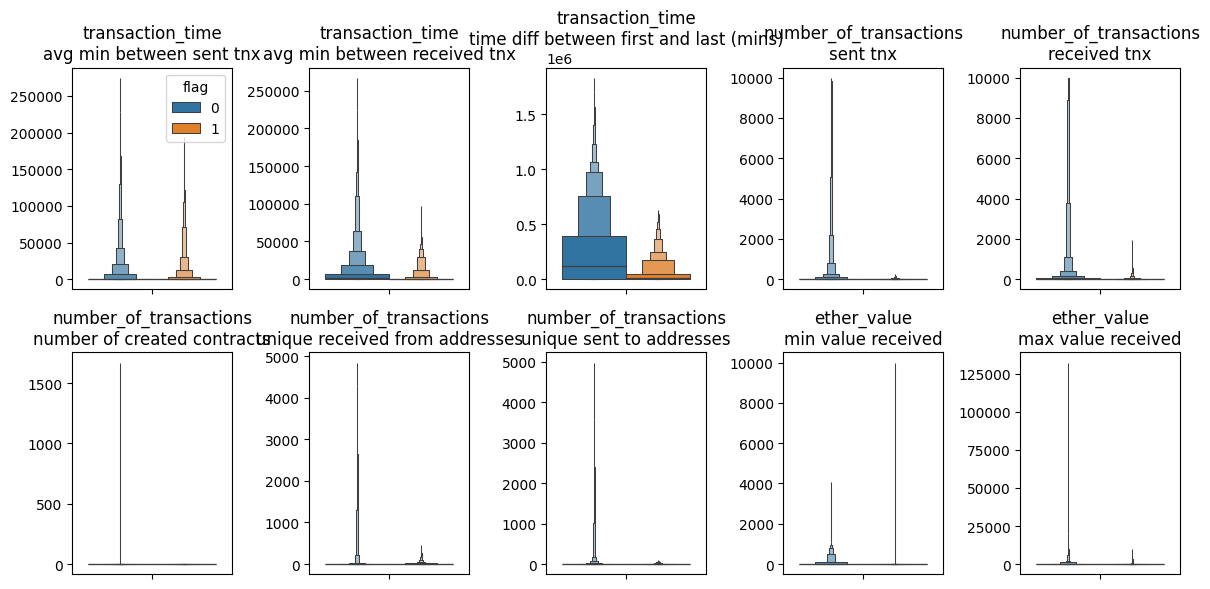

In [126]:
plot_boxenplot(2, 12)

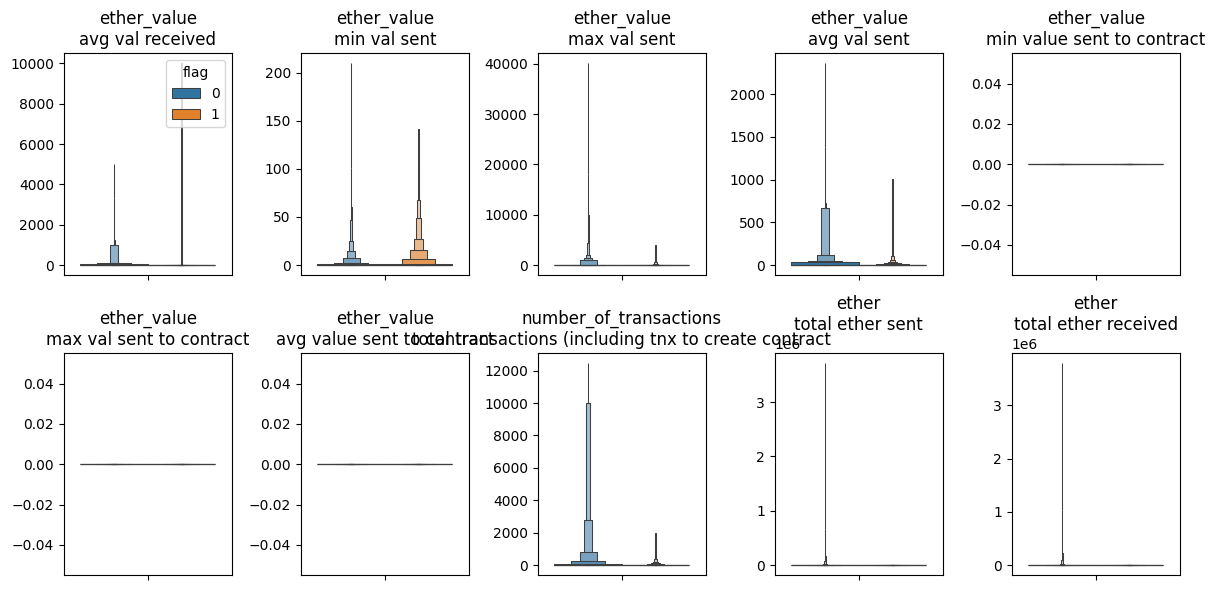

In [127]:
plot_boxenplot(12, 22)

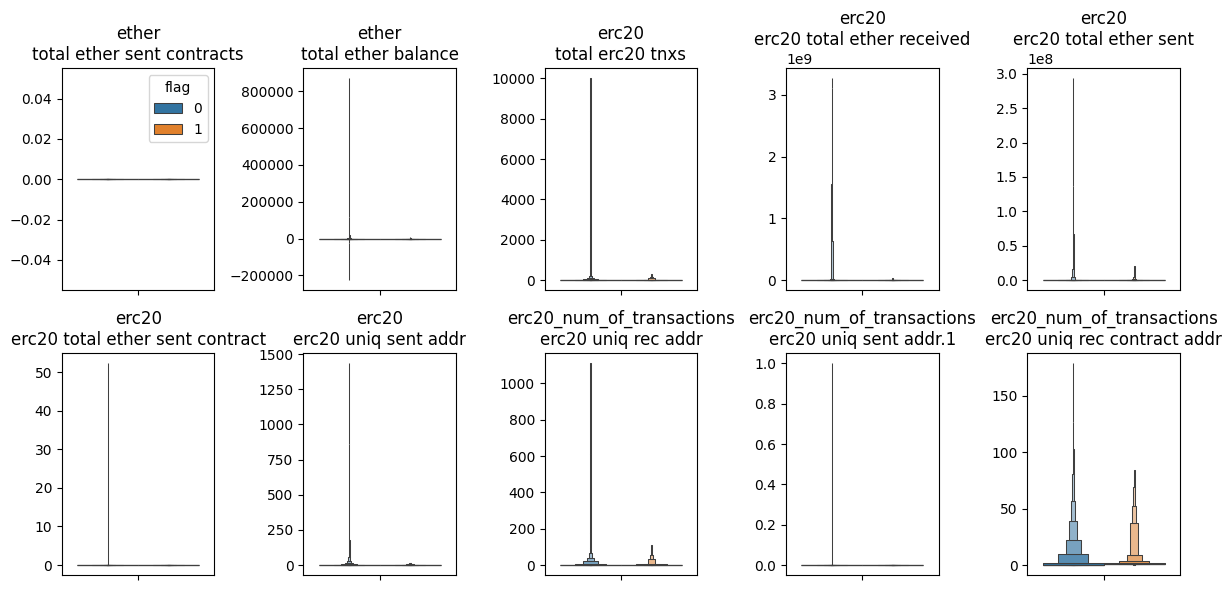

In [128]:
plot_boxenplot(22, 32)

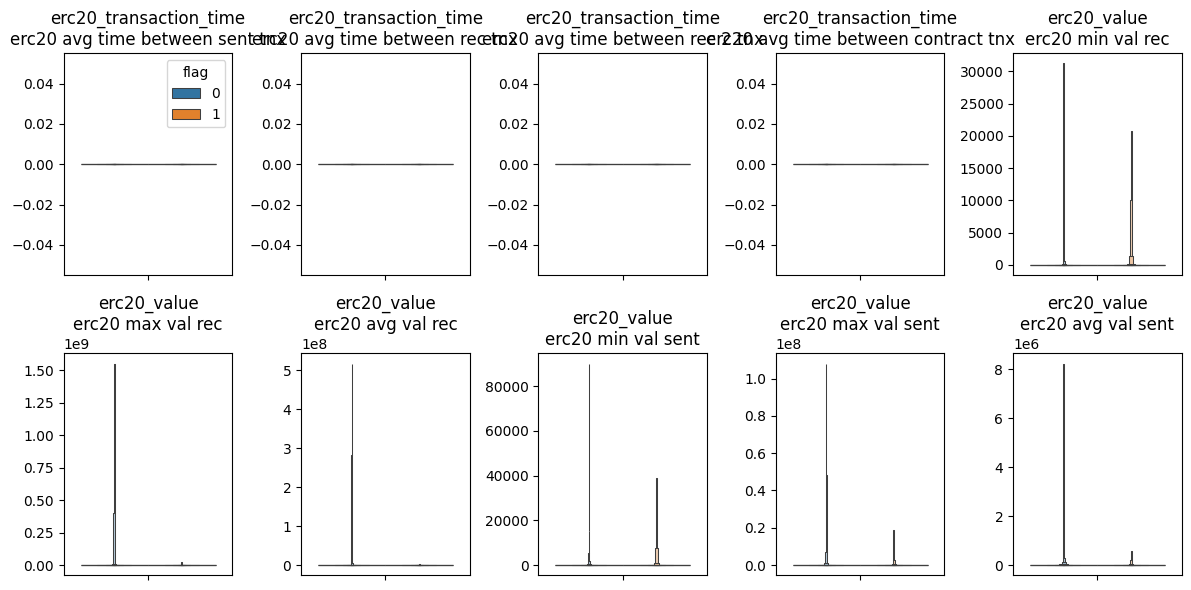

In [129]:
plot_boxenplot(32, 42)

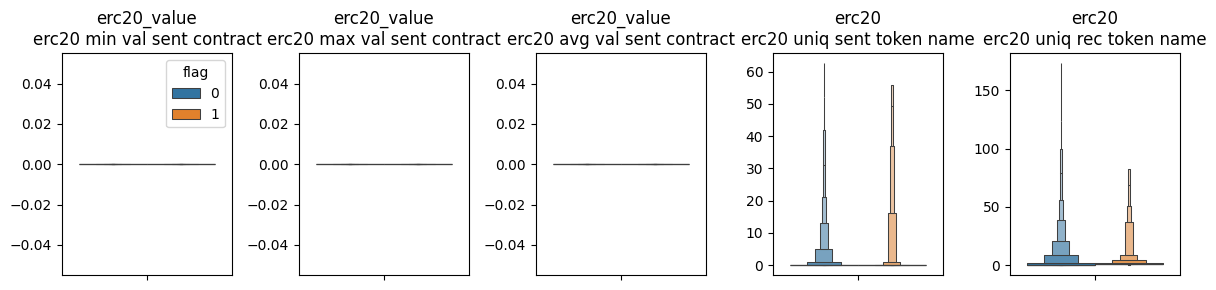

In [124]:
fig, ax = plt.subplots(1, 5, figsize=(12,3))

column = 0
for col in data.iloc[:, 42:47].columns:
    # Plot
    sns.boxenplot(data, y=col, hue='flag', ax=ax[column], showfliers = False)
    ax[column].set_title(col.split('__')[0] + '\n' + col.split('__')[1])
    ax[column].set_ylabel('')
    if column != 0:
        ax[column].get_legend().remove()

    # Switch subplot
    column += 1
    if column == 5:
        column = 0

plt.tight_layout()
plt.show()

In [148]:
# Remove features with constant values
data = data.drop(
    columns=[
        'erc20_transaction_time__erc20 avg time between sent tnx',
        'erc20_transaction_time__erc20 avg time between rec tnx',
        'erc20_transaction_time__erc20 avg time between rec 2 tnx',
        'erc20_transaction_time__erc20 avg time between contract tnx',
        'erc20_value__erc20 min val sent contract',
        'erc20_value__erc20 max val sent contract',
        'erc20_value__erc20 avg val sent contract',
    ]
)
print(data.shape)
data.head()

(9823, 42)


,address,flag,transaction_time__avg min between sent tnx,transaction_time__avg min between received tnx,transaction_time__time diff between first and last (mins),number_of_transactions__sent tnx,number_of_transactions__received tnx,number_of_transactions__number of created contracts,number_of_transactions__unique received from addresses,number_of_transactions__unique sent to addresses,...,erc20_value__erc20 min val rec,erc20_value__erc20 max val rec,erc20_value__erc20 avg val rec,erc20_value__erc20 min val sent,erc20_value__erc20 max val sent,erc20_value__erc20 avg val sent,erc20__erc20 uniq sent token name,erc20__erc20 uniq rec token name,token__erc20 most sent token type,token__erc20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS


## Categorical Features

There are 2 categorical values, the most sent and received ERC20 token types. There are 306 and 468 unique categorical values in the most sent and received token types respectively. 

The most sent token types are '0', 'None', and ' '. These 3 may be the same as there is no token. However, the samples with the blank ' ' value are all flagged as fraud.

The most received token types are '0', 'OmiseGo', and 'Blockwell say NOTSAFU'. All of the 'Blockwell say NOTSAFU' samples are flagged as fraud.

In [149]:
# Explore categorical features
# Count the unique values
for categorical in ['token__erc20 most sent token type', 'token__erc20_most_rec_token_type']:
    num_unique = len(data[categorical].unique())
    print(f'{categorical}: {num_unique}')

token__erc20 most sent token type: 306
token__erc20_most_rec_token_type: 468


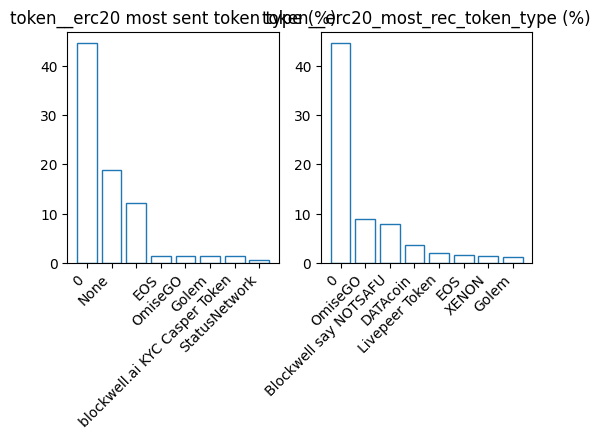

In [151]:
# Plot the count bar
fig, ax = plt.subplots(1, 2, figsize=(6,3))

column = 0
for categorical in ['token__erc20 most sent token type', 'token__erc20_most_rec_token_type']:
    # Only select top 8 values, if there are more than 8 unique values
    bar_plot = pd.DataFrame(data[categorical].value_counts().sort_values(ascending=False)).reset_index().head(8)
    bar_plot.columns = ['category', 'count']
    bar_plot['percentage'] = bar_plot['count'] / data.shape[0] * 100

    ax[column].bar(x=bar_plot['category'], height=bar_plot['percentage'], fill=False, edgecolor='tab:blue')
    ax[column].set_title(categorical + ' (%)')
    ax[column].set_xticklabels(bar_plot['category'], rotation=45, ha='right')

    column += 1

plt.show()

In [220]:
# Find the flag rate (the rate of fraud) for each token.
def flag_rate(col):
    cate_pivot = data[['flag', col]]
    cate_pivot['one'] = 1
    cate_pivot = pd.pivot_table(data=cate_pivot, index=col, columns='flag', values='one', aggfunc='count').reset_index().fillna(0)
    cate_pivot.columns = [col, 'flag_0', 'flag_1']
    cate_pivot['num_samples'] = cate_pivot['flag_0'] + cate_pivot['flag_1']
    cate_pivot['sample_percentage'] = round(cate_pivot['num_samples']/data.shape[0]*100, 1)
    cate_pivot['flag_rate'] = round(cate_pivot['flag_1']/ cate_pivot['num_samples'] * 100, 1)
    cate_pivot = cate_pivot.sort_values('flag_rate', ascending=False)
    cate_pivot = cate_pivot[cate_pivot['sample_percentage'] > 1]
    return cate_pivot

In [221]:
flag_rate('token__erc20 most sent token type')

,token__erc20 most sent token type,flag_0,flag_1,num_samples,sample_percentage,flag_rate
1,,0.0,1191.0,1191.0,12.1,100.0
294,blockwell.ai KYC Casper Token,95.0,33.0,128.0,1.3,25.8
190,OmiseGO,129.0,7.0,136.0,1.4,5.1
123,Golem,125.0,4.0,129.0,1.3,3.1
98,EOS,135.0,3.0,138.0,1.4,2.2
185,None,1853.0,0.0,1853.0,18.9,0.0
4,0,4388.0,0.0,4388.0,44.7,0.0


In [ ]:
flag_rate('token__erc20_most_rec_token_type')

,token__erc20_most_rec_token_type,flag_0,flag_1,num_samples,sample_percentage,flag_rate
74,Blockwell say NOTSAFU,0.0,779.0,779.0,7.9,100.0
257,Livepeer Token,159.0,46.0,205.0,2.1,22.4
436,XENON,121.0,24.0,145.0,1.5,16.6
202,Golem,122.0,4.0,126.0,1.3,3.2
119,DATAcoin,350.0,8.0,358.0,3.6,2.2
309,OmiseGO,857.0,13.0,870.0,8.9,1.5
154,EOS,159.0,2.0,161.0,1.6,1.2
3,0,4388.0,0.0,4388.0,44.7,0.0
